<a href="https://colab.research.google.com/gist/RRuichen/204b0cca48e34769c47e6222e4132a56/-cifar10-ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training an image classifier
We will do the following steps in order:

Load and normalize the CIFAR10 training and test datasets using torchvision

Define a Convolutional Neural Network

Define a loss function

Train the network on the training data

Test the network on the test data

***Load and normalize CIFAR10****

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.

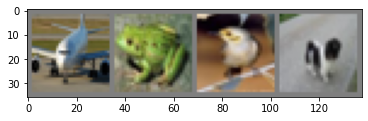

plane frog  bird  dog  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Define a Convolutional Neural Network

modify it to take 3-channel images

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)#input,output
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Net0(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = 0.5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = 0.5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 512)
        nn.Dropout(self.dropout)
        self.fc2 = nn.Linear(512,10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = 0.5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 512)
        nn.Dropout(self.dropout)
        self.fc2 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc3 = nn.Linear(512,10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = 0.5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 512)
        nn.Dropout(self.dropout)
        self.fc2 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc3 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc4 = nn.Linear(512,10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.dropout = 0.5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 512)
        nn.Dropout(self.dropout)
        self.fc2 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc3 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc4 = nn.Linear(512,512)
        nn.Dropout(self.dropout)
        self.fc5 = nn.Linear(512,10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x



net = Net()
net0 = Net0()
net1 = Net1()
net2 = Net2()
net3 = Net3()
net4 = Net4()

Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer0 = optim.SGD(net0.parameters(), lr=0.001, momentum=0.9)
optimizer1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)
optimizer3 = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)
optimizer4 = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)

Train the network

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9,10]
y = []
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    num_correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y.append(accuracy)
print('Finished Training')
#net0
for epoch in range(10):  # loop over the dataset multiple times
    num_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        

        # zero the parameter gradients
        optimizer0.zero_grad()

        # forward + backward + optimize
        outputs = net0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer0.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y0.append(accuracy)

print('Net0 Finished Training')
#net1
for epoch in range(10):  # loop over the dataset multiple times
    num_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y1.append(accuracy)      

print('Net1 Finished Training')
#net2
for epoch in range(10):  # loop over the dataset multiple times
    num_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y2.append(accuracy)

print('Net2 Finished Training')
#net3
for epoch in range(10):  # loop over the dataset multiple times
    num_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer3.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y3.append(accuracy)

print('Net3 Finished Training')
#net4
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer4.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer4.step()

        pred = outputs.argmax(dim=1)
        num_correct += torch.eq(pred, data[1]).sum().float().item()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    accuracy = num_correct/len(trainloader.dataset)
    y4.append(accuracy)

print('Net4 Finished Training')
fig,ax = plt.subplots()
ax.plot(x,y,color = "brown")
ax.plot(x,y0,color = "red")
ax.plot(x,y1,color = "yellow")
ax.plot(x,y2,color = "green")
ax.plot(x,y3,color = "black")
ax.plot(x,y4,color = "blue")

[1,  2000] loss: 2.202
[1,  4000] loss: 1.867
[1,  6000] loss: 1.669
[1,  8000] loss: 1.591
[1, 10000] loss: 1.534
[1, 12000] loss: 1.483
[2,  2000] loss: 1.399
[2,  4000] loss: 1.374
[2,  6000] loss: 1.355
[2,  8000] loss: 1.334
[2, 10000] loss: 1.298
[2, 12000] loss: 1.263
[3,  2000] loss: 1.218
[3,  4000] loss: 1.192
[3,  6000] loss: 1.201
[3,  8000] loss: 1.184
[3, 10000] loss: 1.177
[3, 12000] loss: 1.158
[4,  2000] loss: 1.068
[4,  4000] loss: 1.086
[4,  6000] loss: 1.081
[4,  8000] loss: 1.085
[4, 10000] loss: 1.068
[4, 12000] loss: 1.083
[5,  2000] loss: 0.995
[5,  4000] loss: 1.004
[5,  6000] loss: 1.005
[5,  8000] loss: 1.003
[5, 10000] loss: 1.008
[5, 12000] loss: 0.991
[6,  2000] loss: 0.917
[6,  4000] loss: 0.941
[6,  6000] loss: 0.951
[6,  8000] loss: 0.953
[6, 10000] loss: 0.956
[6, 12000] loss: 0.948
[7,  2000] loss: 0.858
[7,  4000] loss: 0.882
[7,  6000] loss: 0.887
[7,  8000] loss: 0.904
[7, 10000] loss: 0.913
[7, 12000] loss: 0.912
[8,  2000] loss: 0.818
[8,  4000] 

KeyboardInterrupt: ignored

Let’s quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
PATH0 = './cifar_net0.pth'
PATH1 = './cifar_net1.pth'
PATH2 = './cifar_net2.pth'
PATH3 = './cifar_net3.pth'
PATH4 = './cifar_net4.pth'
torch.save(net.state_dict(), PATH)
torch.save(net0.state_dict(), PATH0)
torch.save(net1.state_dict(), PATH1)
torch.save(net2.state_dict(), PATH2)
torch.save(net3.state_dict(), PATH3)
torch.save(net4.state_dict(), PATH4)

#Test the network on the test data

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

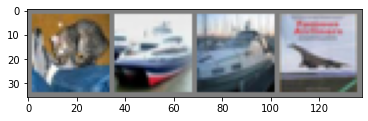

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

let’s load back in our saved model 

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
net0 = Net0()
net0.load_state_dict(torch.load(PATH0))
net1 = Net1()
net1.load_state_dict(torch.load(PATH1))
net2 = Net2()
net2.load_state_dict(torch.load(PATH2))
net3 = Net3()
net3.load_state_dict(torch.load(PATH3))
net4 = Net4()
net4.load_state_dict(torch.load(PATH4))

<All keys matched successfully>

now let us see what the neural network thinks these examples above are:

In [ ]:
outputs = net(images)
outputs0 = net0(images)
outputs1 = net1(images)
outputs2 = net2(images)
outputs3 = net3(images)
outputs4 = net4(images)

The outputs are probabilities for the 10 classes. The higher the probability for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest probability:

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
_, predicted0 = torch.max(outputs0, 1)

print('Predicted: ', ' '.join(f'{classes[predicted0[j]]:5s}'
                              for j in range(4)))
_, predicted1 = torch.max(outputs1, 1)

print('Predicted: ', ' '.join(f'{classes[predicted1[j]]:5s}'
                              for j in range(4)))
_, predicted2 = torch.max(outputs2, 1)

print('Predicted: ', ' '.join(f'{classes[predicted2[j]]:5s}'
                              for j in range(4)))
_, predicted3 = torch.max(outputs3, 1)

print('Predicted: ', ' '.join(f'{classes[predicted3[j]]:5s}'
                              for j in range(4)))
_, predicted4 = torch.max(outputs4, 1)

print('Predicted: ', ' '.join(f'{classes[predicted4[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 
Predicted:  cat   ship  ship  ship 
Predicted:  cat   car   car   plane
Predicted:  cat   car   ship  ship 
Predicted:  cat   car   ship  plane
Predicted:  cat   ship  plane plane


Let us look at how the network performs on the whole dataset.

Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network0 on the 10000 test images: 54 %
Accuracy of the network1 on the 10000 test images: 56 %
Accuracy of the network2 on the 10000 test images: 56 %
Accuracy of the network3 on the 10000 test images: 56 %
Accuracy of the network4 on the 10000 test images: 53 %


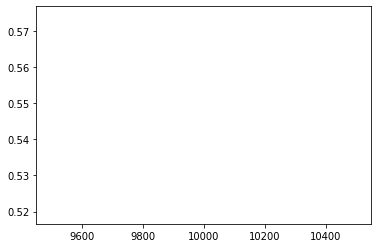

In [ ]:
correct = 0
total = 0
correct0 = 0
total0 = 0
correct1 = 0
total1 = 0
correct2 = 0
total2 = 0
correct3 = 0
total3 = 0
correct4 = 0
total4 = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
#net0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs0 = net0(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted0 = torch.max(outputs0.data, 1)
        total0 += labels.size(0)
        correct0 += (predicted0 == labels).sum().item()

print(f'Accuracy of the network0 on the 10000 test images: {100 * correct0 // total0} %')
#net1
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs1 = net1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted1 = torch.max(outputs1.data, 1)
        total1 += labels.size(0)
        correct1 += (predicted1 == labels).sum().item()

print(f'Accuracy of the network1 on the 10000 test images: {100 * correct1 // total1} %')
#net2
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs2 = net2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted2 = torch.max(outputs2.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted2 == labels).sum().item()

print(f'Accuracy of the network2 on the 10000 test images: {100 * correct2 // total2} %')
#net3
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs3 = net3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted3 = torch.max(outputs3.data, 1)
        total3 += labels.size(0)
        correct3 += (predicted3 == labels).sum().item()

print(f'Accuracy of the network3 on the 10000 test images: {100 * correct1 // total1} %')
#net4
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs4 = net4(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted4 = torch.max(outputs4.data, 1)
        total4 += labels.size(0)
        correct4 += (predicted4 == labels).sum().item()

print(f'Accuracy of the network4 on the 10000 test images: {100 * correct4 // total4} %')

what are the classes that performed well, and the classes that did not perform well:

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#net0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net0(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'net0 Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#net1
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'net1 Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#net2
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'net2 Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#net3
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net3(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'net3 Accuracy for class: {classname:5s} is {accuracy:.1f} %')

#net4
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net4(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'net4 Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.0 %
Accuracy for class: car   is 59.7 %
Accuracy for class: bird  is 37.0 %
Accuracy for class: cat   is 40.3 %
Accuracy for class: deer  is 33.9 %
Accuracy for class: dog   is 42.5 %
Accuracy for class: frog  is 77.1 %
Accuracy for class: horse is 70.4 %
Accuracy for class: ship  is 47.4 %
Accuracy for class: truck is 74.4 %
net0 Accuracy for class: plane is 60.0 %
net0 Accuracy for class: car   is 75.2 %
net0 Accuracy for class: bird  is 42.6 %
net0 Accuracy for class: cat   is 25.5 %
net0 Accuracy for class: deer  is 41.2 %
net0 Accuracy for class: dog   is 61.0 %
net0 Accuracy for class: frog  is 61.3 %
net0 Accuracy for class: horse is 57.8 %
net0 Accuracy for class: ship  is 81.5 %
net0 Accuracy for class: truck is 38.8 %
net1 Accuracy for class: plane is 54.3 %
net1 Accuracy for class: car   is 76.4 %
net1 Accuracy for class: bird  is 35.1 %
net1 Accuracy for class: cat   is 61.4 %
net1 Accuracy for class: deer  is 27.3 %
net1 Accuracy for class: 

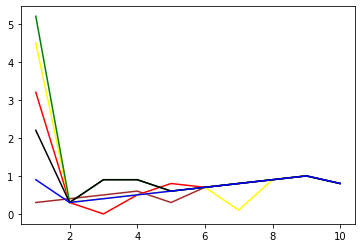